# Twitter @WeRateDogs Analysis by Gaganpreet Singh

In [63]:
#importing neccessary libraries
import pandas as pd
import requests
import json
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering the date

In [64]:
# Import the Twitter archive CSV file into a DataFrame
twitter_Arc_df = pd.read_csv('twitter-archive-enhanced.csv')

In [65]:
#Printing sample 5 rows from twitter archive data
twitter_Arc_df.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2096  670755717859713024                    NaN                  NaN   
1361  703079050210877440                    NaN                  NaN   
820   770414278348247044                    NaN                  NaN   
790   773922284943896577                    NaN                  NaN   
1448  696405997980676096                    NaN                  NaN   

                      timestamp  \
2096  2015-11-29 00:06:39 +0000   
1361  2016-02-26 04:48:02 +0000   
820   2016-08-30 00:14:12 +0000   
790   2016-09-08 16:33:46 +0000   
1448  2016-02-07 18:51:43 +0000   

                                                 source  \
2096  <a href="http://twitter.com/download/iphone" r...   
1361  <a href="http://twitter.com/download/iphone" r...   
820   <a href="http://twitter.com/download/iphone" r...   
790   <a href="http://twitter.com/download/iphone" r...   
1448  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2096  Say hello to Gin &amp; Tonic. They're having a...                  NaN   
1361  This is a Butternut Cumberfloof. It's not wind...                  NaN   
820   Meet Al Cabone. He's a gangsta puppa. Rather h...                  NaN   
790   This is Heinrich (pronounced "Pat"). He's a Bo...                  NaN   
1448  This is Berb. He just found out that they have...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2096                       NaN                        NaN   
1361                       NaN                        NaN   
820                        NaN                        NaN   
790                        NaN                        NaN   
1448                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2096  https://twitter.com/dog_rates/status/670755717...                 9   
1361  https://twitter.com/dog_rates/status/703079050...                11   
820   https://twitter.com/dog_rates/status/770414278...                11   
790   https://twitter.com/dog_rates/status/773922284...                12   
1448  https://twitter.com/dog_rates/status/696405997...                 7   

      rating_denominator      name doggo floofer pupper puppo  
2096                  10       Gin  None    None   None  None  
1361                  10         a  None    None   None  None  
820                   10        Al  None    None   None  None  
790                   10  Heinrich  None    None   None  None  
1448                  10      Berb  None    None   None  None

In [66]:
# Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
# Import the tweet image predictions TSV file into a DataFrame
twitter_img_df = pd.read_csv('image_predictions.tsv', sep = '\t')

In [67]:
twitter_img_df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [68]:
# Reading tweet's JSON data line by line and later convert to a DataFrame with the help of list of dictionaries
record = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        
        record.append({'tweet_id': data['id'],
                       'retweet_count': data['retweet_count'],
                       'favorite_count': data['favorite_count'],
                       'display_text_range': data['display_text_range']
                      })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
twitter_api_df = pd.DataFrame(record, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

In [69]:
twitter_api_df.head()

tweet_id  retweet_count  favorite_count display_text_range
0  892420643555336193           8853           39467            [0, 85]
1  892177421306343426           6514           33819           [0, 138]
2  891815181378084864           4328           25461           [0, 121]
3  891689557279858688           8964           42908            [0, 79]
4  891327558926688256           9774           41048           [0, 138]



## Assessing the data

In [70]:
twitter_Arc_df.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
844   766693177336135680                    NaN                  NaN   
1230  713411074226274305                    NaN                  NaN   
828   768970937022709760                    NaN                  NaN   
2309  666804364988780544                    NaN                  NaN   
215   851224888060895234                    NaN                  NaN   

                      timestamp  \
844   2016-08-19 17:47:52 +0000   
1230  2016-03-25 17:03:49 +0000   
828   2016-08-26 00:38:52 +0000   
2309  2015-11-18 02:25:23 +0000   
215   2017-04-10 00:06:42 +0000   

                                                 source  \
844   <a href="http://twitter.com/download/iphone" r...   
1230  <a href="http://twitter.com/download/iphone" r...   
828   <a href="http://twitter.com" rel="nofollow">Tw...   
2309  <a href="http://twitter.com/download/iphone" r...   
215   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
844   This is Brudge. He's a Doberdog. Going to be h...                  NaN   
1230  Here we see an extremely rare Bearded Floofmal...                  NaN   
828   This is Kirby. His bowl weighs more than him. ...                  NaN   
2309  This is Jockson. He is a Pinnacle Sagittarius....                  NaN   
215   Meet Snoop. His number one passion is sticking...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
844                        NaN                        NaN   
1230                       NaN                        NaN   
828                        NaN                        NaN   
2309                       NaN                        NaN   
215                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
844   https://twitter.com/dog_rates/status/766693177...                11   
1230  https://twitter.com/dog_rates/status/713411074...                11   
828   https://twitter.com/dog_rates/status/768970937...                12   
2309  https://twitter.com/dog_rates/status/666804364...                 8   
215   https://twitter.com/dog_rates/status/851224888...                13   

      rating_denominator     name doggo floofer pupper puppo  
844                   10   Brudge  None    None   None  None  
1230                  10     None  None    None   None  None  
828                   10    Kirby  None    None   None  None  
2309                  10  Jockson  None    None   None  None  
215                   10    Snoop  None    None   None  None

`twitter_Arc_df` (Twitter archive) columns:

- `tweet_id`: the unique identifier for each tweet
- `in_reply_to_status_id`: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- `in_reply_to_user_id': if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
- `timestamp`: time when this Tweet was created
- `source`: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
- `text`: actual UTF-8 text of the status update
- `retweeted_status_id`: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
- `retweeted_status_user_id`: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
- `retweeted_status_timestamp`: time of retweet
- `expanded_urls`: tweet URL
- `rating_numerator`: numerator of the rating of a dog. Note: ratings almost always greater than 10
- `rating_denominator`: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
- `name`: name of the dog
- `doggo`: one of the 4 dog "stage"
- `floofer`: one of the 4 dog "stage"
- `pupper`: one of the 4 dog "stage"
- `puppo`: one of the 4 dog "stage"

In [71]:
twitter_Arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [72]:
# Check if there are any records in arc_df which are retweets
len(twitter_Arc_df[twitter_Arc_df['retweeted_status_id'].isnull() == False])

181

In [73]:
#checking the occurrences of values in rating_denominator column
twitter_Arc_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [74]:
#checking the occurrences of values in rating_numerator column

twitter_Arc_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [75]:
#unique names in 'name' column
twitter_Arc_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [76]:
# Number of records whose both doggo and floofer columns are not None
len(twitter_Arc_df[(twitter_Arc_df.doggo != 'None') & (twitter_Arc_df.floofer != 'None')])


1

In [77]:
# Number of records whose both doggo and pupper columns are not None
len(twitter_Arc_df[(twitter_Arc_df.doggo != 'None') & (twitter_Arc_df.pupper != 'None')])


12

In [78]:
# Number of records whose both doggo and puppo columns are not None
len(twitter_Arc_df[(twitter_Arc_df.doggo != 'None') & (twitter_Arc_df.puppo != 'None')])


1

In [79]:
# Number of records whose both floofer and pupper columns are not None
len(twitter_Arc_df[(twitter_Arc_df.floofer != 'None') & (twitter_Arc_df.pupper != 'None')])


0

In [80]:
# Number of records whose both floofer and puppo columns are not None

len(twitter_Arc_df[(twitter_Arc_df.floofer != 'None') & (twitter_Arc_df.puppo != 'None')])


0

In [81]:
# Number of records whose both puppo and pupper columns are not None

len(twitter_Arc_df[(twitter_Arc_df.puppo != 'None') & (twitter_Arc_df.pupper != 'None')])


0

In [82]:
## Number of records whose floofer, pupper and puppo columns are not None

len(twitter_Arc_df[(twitter_Arc_df.floofer != 'None') & (twitter_Arc_df.pupper != 'None') & (twitter_Arc_df.puppo != 'None')])


0

In [83]:
# Number of records whose floofer, pupper, puppo, doggo  columns are not None
len(twitter_Arc_df[(twitter_Arc_df.floofer != 'None') & (twitter_Arc_df.pupper != 'None') & (twitter_Arc_df.puppo != 'None') & (twitter_Arc_df.doggo != 'None')])


0

In [84]:
twitter_image_df.sample(5)

tweet_id                                          jpg_url  \
1093  719704490224398336  https://pbs.twimg.com/media/CfznaXuUsAAH-py.jpg   
1270  749981277374128128  https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg   
1005  709042156699303936  https://pbs.twimg.com/media/CdcGBB3WwAAGBuU.jpg   
34    666435652385423360  https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg   
301   671497587707535361  https://pbs.twimg.com/media/CVGjflNWoAEwgrQ.jpg   

      img_num                        p1   p1_conf  p1_dog            p2  \
1093        1              home_theater  0.059033   False  window_shade   
1270        1                   bow_tie  0.533941   False    sunglasses   
1005        1                    hotdog  0.826579   False    Rottweiler   
34          1  Chesapeake_Bay_retriever  0.184130    True     chain_saw   
301         1                     swing  0.089165   False        paddle   

       p2_conf  p2_dog                  p3   p3_conf  p3_dog  
1093  0.038299   False             bathtub  0.035528   False  
1270  0.080822   False            sunglass  0.050776   False  
1005  0.068179    True  Labrador_retriever  0.049218    True  
34    0.056775   False         power_drill  0.036763   False  
301   0.080747   False         bathing_cap  0.065694   False

`twitter_image_df` (tweet image predictions) columns:

- `tweet_id`: the unique identifier for each tweet
- `jpg_url`: dog's image URL
- `img_num`: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
- `p1`: algorithm's #1 prediction for the image in the tweet
- `p1_conf`: how confident the algorithm is in its #1 prediction
- `p1_dog`: whether or not the #1 prediction is a breed of dog
- `p2`: algorithm's #2 prediction for the image in the tweet
- `p2_conf`: how confident the algorithm is in its #2 prediction
- `p2_dog`: whether or not the #2 prediction is a breed of dog
- `p3`: algorithm's #3 prediction for the image in the tweet
- `p3_conf`: how confident the algorithm is in its #3 prediction
- `p3_dog`: whether or not the #3 prediction is a breed of dog

In [85]:
twitter_image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [86]:
twitter_api_df.sample(5)

tweet_id  retweet_count  favorite_count display_text_range
1082  738402415918125056            955            3599            [0, 57]
51    882045870035918850           5203           29900           [0, 133]
874   761004547850530816           3952           12482            [0, 69]
285   838831947270979586          12643               0           [0, 140]
1527  690248561355657216            477            1845           [0, 137]

`twitter_Api_df` (tweet status) columns:

- `id`: the unique identifier for each tweet
- `retweet_count`: number of times this Tweet has been retweeted
- `favorite_count`: indicates approximately how many times this Tweet has been liked by Twitter users
- `display_text_range`: an array of two unicode code point indices, identifying the inclusive start and exclusive end of the displayable content of the tweet

In [87]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
display_text_range    2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


## Quality issues

`twitter_arc_df`(Twitter archive) table

- also contains retweets other than original tweets
- many tweet_id(s) of `twitter_arc_df` table are missing in `twitter_img_df` (image predictions) table
- erroneous datatypes in `in_reply_to_status_id`, `in_reply_to_user_id` and `timestamp` columns
- unnecessary html tags in `source` column in place of utility name 
e.g. <a href=""http://twitter.com/download/iphone""rel=""nofollow"">Twitter for iPhone</a>
- `text` column contains unneccessary text
- `rating_denominator` column has values other than 10
- incorrect dog names starting with lowercase characters (e.g. a, an, actually, by)
- some records have more than one dog stage

## Tidyness issues

- `twitter_arc_df` - Original tweets will have empty `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns, which can be dropped
- Reshape `twitter_arc_df`- `doggo`, `floofer`, `pupper` and `puppo` columns should be merged into one column named `stage`
- New column called `breed` column should be added in `twitter_arc_df` table from `twitter_img_df`
- `retweet_count` and `favorite_count` columns from `twitter_api_df` table should be joined with `twitter_arc_df` table

## Cleaning the data

In [88]:
# Take a copy of arc_df on which the cleaning tasks will be performed
twitter_Arc_df_clean = twitter_Arc_df.copy()
twitter_img_df_clean = twitter_img_df.copy()
twitter_api_df_clean = twitter_api_df.copy()

### Quality

- **`twitter_Arc_df` contains retweets**

#### *Define*

 Remove the records which are **retweets** (i.e. `retweeted_status_id` column is null)

#### Code

In [89]:
twitter_Arc_df_clean = twitter_Arc_df_clean[twitter_Arc_df_clean.retweeted_status_id.isnull()]

#### Test

In [90]:
sum(twitter_Arc_df_clean.retweeted_status_id.isnull() == False)

0

**any tweet_id(s) of `twitter_arc_df` table are missing in `twitter_img_df` (image predictions) table**

#### *Define*

Keep only those records in `twitter_Arc_df` table whose `tweet_id` exists in `twitter_image_df` table

#### Code

In [91]:
twitter_Arc_df_clean = twitter_Arc_df_clean[twitter_Arc_df_clean.tweet_id.isin(twitter_image_df.tweet_id)]

#### Test

In [92]:
sum(~twitter_Arc_df_clean.tweet_id.isin(twitter_image_df.tweet_id))

0


**Erroneous datatypes in `in_reply_to_status_id`, `in_reply_to_user_id` and `timestamp` columns**


#### *Define*

Convert `in_reply_to_status_id` and `in_reply_to_user_id` to data type integer. Convert `timestamp` to datetime data type

#### Code

In [93]:
twitter_Arc_df_clean.in_reply_to_status_id = twitter_Arc_df_clean.in_reply_to_status_id.fillna(0)
twitter_Arc_df_clean.in_reply_to_user_id = twitter_Arc_df_clean.in_reply_to_user_id.fillna(0)

twitter_Arc_df_clean.in_reply_to_status_id = twitter_Arc_df_clean.in_reply_to_status_id.astype(np.int64)
twitter_Arc_df_clean.in_reply_to_user_id = twitter_Arc_df_clean.in_reply_to_user_id.astype(np.int64)

twitter_Arc_df_clean.timestamp = pd.to_datetime(twitter_Arc_df_clean.timestamp)

#### Test

In [94]:
twitter_Arc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null int64
in_reply_to_user_id           1994 non-null int64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: datetime64[ns](1), flo

**unnecessary html tags in `source` column in place of utility name 
e.g. <a href=""http://twitter.com/download/iphone""rel=""nofollow"">Twitter for iPhone</a>**

#### *Define*

Strip all html anchor tags (i.e. <a..></a>) in source column and retain just the text in between the tags. Convert the datatype from string to categorical.

#### Code

In [95]:
twitter_Arc_df_clean['source'] = twitter_Arc_df_clean['source'].str.extract(r'.+>(.+)<.+')

In [96]:
twitter_Arc_df_clean.source = twitter_Arc_df_clean.source.astype('category')

#### Test

In [97]:
twitter_Arc_df_clean['source'].unique()

[Twitter for iPhone, Twitter Web Client, TweetDeck]
Categories (3, object): [Twitter for iPhone, Twitter Web Client, TweetDeck]

In [98]:
twitter_Arc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null int64
in_reply_to_user_id           1994 non-null int64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null category
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: category(1), datetim

 **`text` column contains unneccessary text**

#### *Define*

extract relevant text from `text` column

#### Code

In [99]:
twitter_Arc_df_clean.iloc[210].text


'Say hello to Maddie and Gunner. They are considerably pupset about bath time. Both 12/10 but Gunner needs your help\n\nhttps://t.co/JesYTzb1Jo https://t.co/5cncH08G1o'

In [100]:
twitter_Arc_df_clean.iloc[20].text
twitter_Arc_df_clean['text'] = twitter_Arc_df_clean['text'].str.extract(r'(.+ \d+/\d+).+')


#### Test

In [101]:
twitter_Arc_df_clean.iloc[210].text

'Say hello to Maddie and Gunner. They are considerably pupset about bath time. Both 12/10'

**`rating_denominator` column has values other than 10**

#### *Define*

For records whose `rating_denominator` is greater than 10 and divisible by 10, use the quotient of denominator/10 as the divisor to divide the `rating_numerator`. If the numerator turns out to be divisible (i.e. remainder=0), assign this quotient as the `rating_numerator`.**Eg: 48/40 will get converted to 12/10**

For the remaining records, check if the text column contains any fraction whose denominator is 10. If it does, update the `rating_numerator` with the numerator value of this fraction.

#### Code

In [102]:
# iterate through all those records whose rating_denominator is not 10
for i, row in twitter_Arc_df_clean[twitter_Arc_df_clean.rating_denominator != 10].iterrows():
    
    # if rating_denominator is greater than 10 and divisible by 10
    if row.rating_denominator > 10 and row.rating_denominator%10 == 0:
        # assign divisor as the quotient
        divisor = row.rating_denominator/10
        n = row.rating_numerator
        
        # if rating_numerator is greater than 10 and divisible by the divisor
        if n%divisor == 0:
            # reassign rating_denominator as 10
            twitter_Arc_df_clean.set_value(i, 'rating_denominator', 10)
            # reassign rating_numerator as the quotient of rating_numerator by divisor
            twitter_Arc_df_clean.set_value(i, 'rating_numerator', int(n/divisor))
    
    # for all those records whose rating_denominator is either less than 10 or not divisible by 10
    else:
        # extract all fractions(ratings) from text using tokens function
        pattern = re.compile('.+ (\d+)/(\d+).+')
        # iterate through all the fractions
        fractions = pattern.findall(str(row.text))
        if(len(fractions)>0): 
            # if denominator of any such fraction is equal to 10
            if (fractions[0][1] == '10'):
                # reassign rating_denominator as 10
                archive_clean.set_value(i, 'rating_denominator', 10)
                # reassign rating_numerator as the numerator value of this fraction
                archive_clean.set_value(i, 'rating_numerator', int(fractions[0][0]))
            

C:\Users\singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


#### Test

In [103]:
twitter_Arc_df_clean.rating_denominator.value_counts()

10    1990
11       2
7        1
2        1
Name: rating_denominator, dtype: int64

 **Incorrect dog names starting with lowercase characters (e.g. a, an, actually, by)**

#### Define

Replace all lowercase values of name column with **None**

#### Code

In [104]:
twitter_Arc_df_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [105]:
twitter_Arc_df_clean.name.nunique()

936

In [106]:
twitter_Arc_df_clean.name = twitter_Arc_df_clean.name.str.replace('^[a-z]+', 'None')

#### Test

In [107]:
twitter_Arc_df_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

In [108]:
twitter_Arc_df_clean.name.nunique()

914

s**ome records have more than one dog stage**

#### *Define*

There is **one** record that has both doggo and floofer and another record that has both doggo and puppo. For these 2 records, take a look at the text manually to decide one dog stage for each of them.

There are **12** records which have both doggo and pupper. As per the dogtionary, doggo and pupper are sometimes used interchangeably. Therefore, set pupper column as None for these records.

#### Code

In [109]:
for i, row in twitter_Arc_df_clean[(twitter_Arc_df_clean.doggo != 'None') & 
                                   (twitter_Arc_df_clean.floofer != 'None')].iterrows():
    tweet_id_df = row.tweet_id
    print(row.tweet_id, row.text)

854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10


In [111]:
for i, row in twitter_Arc_df_clean[(twitter_Arc_df_clean.doggo != 'None') & 
                                    (twitter_Arc_df_clean.puppo != 'None')].iterrows():
    tweet_id_dp = row.tweet_id
    print(row.tweet_id, row.text)

855851453814013952 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10


In [112]:
# based on the above texts, doggo should be set as None for both the records
twitter_Arc_df_clean['doggo'][twitter_Arc_df_clean.tweet_id.isin([tweet_id_df, tweet_id_dp])] = 'None'

C:\Users\singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [113]:
# set pupper column as None for records which have both doggo and pupper
twitter_Arc_df_clean['pupper'][(twitter_Arc_df_clean.doggo != 'None') & (twitter_Arc_df_clean.pupper != 'None')] = 'None'

C:\Users\singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [114]:
len(twitter_Arc_df_clean[((twitter_Arc_df_clean.doggo != 'None') & (twitter_Arc_df_clean.pupper != 'None'))
                  | ((twitter_Arc_df_clean.doggo != 'None') & (twitter_Arc_df_clean.floofer != 'None')) 
                  | ((twitter_Arc_df_clean.doggo != 'None') & (twitter_Arc_df_clean.puppo != 'None'))])

0

## Tidyness

`twitter_arc_df` - Original tweets will have empty `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns, which can be dropped

#### Define

- Drop `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns from `twitter_Arc_df` table

#### Code

In [115]:
twitter_Arc_df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [116]:
twitter_Arc_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

**Reshape `twitter_arc_df`- `doggo`, `floofer`, `pupper` and `puppo` columns should be merged into one column named `stage`.
**

#### Define

Columns `doggo`, `floofer`, `pupper` and `puppo` columns in `twitter_Arc_df` table should be merged into one column named `stage` using pythons **Melt** function. Convert the datatype from string to **Categorical**

#### Code

In [117]:
#Reshaping the twitter_Arc_df and storing the updated one into new dataframe
melted_twitter_Arc_df = pd.melt(twitter_Arc_df_clean, id_vars = ["tweet_id", "in_reply_to_status_id",
                                                                 "in_reply_to_user_id", "timestamp",
                                                                "source","text","expanded_urls","rating_numerator",
                                                                "rating_denominator","name"],value_name = "stage") 

In [118]:
melted_twitter_Arc_df['stage'].value_counts()

None       7670
pupper      203
doggo        72
puppo        23
floofer       8
Name: stage, dtype: int64

In [119]:
#Removing the 'variable' column created by melt function
melted_twitter_Arc_df.drop(['variable'], axis = 1, inplace = True)

In [120]:
#Removing the unneccessary duplicated
melted_twitter_Arc_df.drop_duplicates(inplace=True)

In [121]:
#Removing some more trash columns created by melt function
melted_copy = melted_twitter_Arc_df.copy()
for i, row in melted_copy.iterrows():
    if (len(melted_twitter_Arc_df[melted_twitter_Arc_df['tweet_id'] == row.tweet_id]) == 2):
        if (row.stage == "None"):
            melted_twitter_Arc_df.drop(i, inplace = True)
            
#updating the original dataframe
twitter_Arc_df_clean = melted_twitter_Arc_df.copy()

In [122]:
# convert the datatype from string to categorical
twitter_Arc_df_clean.stage = twitter_Arc_df_clean.stage.astype('category')

#### Test

In [123]:
twitter_Arc_df_clean['stage'].value_counts()

None       1688
pupper      203
doggo        72
puppo        23
floofer       8
Name: stage, dtype: int64

In [124]:
twitter_Arc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 6795
Data columns (total 11 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1945 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
stage                    1994 non-null category
dtypes: category(2), datetime64[ns](1), int64(5), object(3)
memory usage: 160.0+ KB


**New column called `breed` should be added in `twitter_arc_df` table from `twitter_img_df`**

#### Define

Create breed in `twitter_arc_df` table. For each tweet_id, use the `twitter_img_df` table to check if `p1_conf` is greater than 0.95 (i.e. 95% confidence interval) and `p1_dog` is True. If it is, set the value of `p1` column in `breed` column.

#### Code

In [125]:
twitter_Arc_df_clean['breed'] = 'None'
for i, row in twitter_Arc_df_clean.iterrows():
    
    img_prediction = twitter_image_df[twitter_image_df.tweet_id == row.tweet_id]
    p1_conf = img_prediction.p1_conf.iloc[0]
    p1_dog = img_prediction.p1_dog.iloc[0]
    #  check if p1_conf is greater than 0.95 (i.e. 95% confidence interval) and p1_dog is True
    if p1_conf >= 0.95 and p1_dog:
        twitter_Arc_df_clean.set_value(i, 'breed', img_prediction.p1.iloc[0])

C:\Users\singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [126]:
twitter_Arc_df_clean.breed.unique()

array(['None', 'Samoyed', 'French_bulldog', 'Blenheim_spaniel',
       'Pembroke', 'vizsla', 'basset', 'pug', 'Labrador_retriever',
       'Shetland_sheepdog', 'komondor', 'Chihuahua', 'golden_retriever',
       'Bernese_mountain_dog', 'Brittany_spaniel', 'Great_Pyrenees',
       'Norwegian_elkhound', 'Pekinese', 'Old_English_sheepdog',
       'Pomeranian', 'bull_mastiff', 'malamute', 'chow', 'Siberian_husky',
       'Saint_Bernard', 'keeshond', 'toy_poodle', 'beagle',
       'German_shepherd', 'Weimaraner', 'cocker_spaniel', 'Maltese_dog',
       'Rottweiler', 'Tibetan_mastiff', 'German_short-haired_pointer',
       'Great_Dane', 'Boston_bull', 'schipperke', 'English_springer',
       'dalmatian', 'Cardigan', 'collie', 'Shih-Tzu', 'briard', 'boxer',
       'miniature_pinscher'], dtype=object)

**`retweet_count` and `favorite_count` columns from `status_df` table should be joined with `twitter_arc_df` table**

#### Define

Fetch the `retweet_count` and `favorite_count` columns of `twitter_api_df` table and assign those values to `twitter_arc_df` table

#### Code

In [127]:
twitter_Arc_df_clean['retweet_count'] = 0
twitter_Arc_df_clean['favorite_count'] = 0

for i, row in twitter_Arc_df_clean.iterrows():
    # fetch the retweet_count and favorite_count columns of status_df table and assign those values
    twitter_Arc_df_clean.set_value(i, 'retweet_count', twitter_api_df[twitter_api_df.tweet_id == row.tweet_id].retweet_count.iloc[0])
    twitter_Arc_df_clean.set_value(i, 'favorite_count', twitter_api_df[twitter_api_df.tweet_id == row.tweet_id].favorite_count.iloc[0])    

C:\Users\singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


#### Test

In [128]:
twitter_Arc_df_clean[['tweet_id', 'retweet_count', 'favorite_count']].sample(5)

tweet_id  retweet_count  favorite_count
1954  666649482315059201            608             923
356   815390420867969024           4407           11467
1745  670691627984359425            266             632
1089  700167517596164096            836            2903
1920  667369227918143488            173             385

In [129]:
twitter_Arc_df_clean.sample()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
683  754856583969079297                      0                    0   

              timestamp              source  \
683 2016-07-18 01:53:28  Twitter for iPhone   

                                                  text  \
683  This is Winnie. She's not a fan of the fast mo...   

                                         expanded_urls  rating_numerator  \
683  https://twitter.com/dog_rates/status/754856583...                11   

     rating_denominator    name stage breed  retweet_count  favorite_count  
683                  10  Winnie  None  None           2870            7616

## Storing the data

In [131]:
twitter_Arc_df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)
twitter_img_df_clean.to_csv('twitter_image_prediction_master.csv', encoding = 'utf-8', index = False)

## Analyzing the data

In [132]:
twitter_Arc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 6795
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1945 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
stage                    1994 non-null category
breed                    1994 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
dtypes: category(2), datetime64[ns](1), int64(7), object(4)
memory usage: 286.7+ KB


**Analyzing number of tweets posted by WeRateDogs' over time**

In [133]:
twitter_Arc_df_clean['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts()

2015-12    367
2015-11    296
2016-01    169
2016-03    120
2016-02    111
2016-07     88
2016-06     81
2017-01     66
2016-10     65
2017-02     64
2016-09     63
2016-08     59
2016-05     57
2016-12     54
2016-04     54
2016-11     53
2017-07     49
2017-03     48
2017-06     44
2017-05     43
2017-04     41
2017-08      2
Name: timestamp, dtype: int64

**Most used Twitter source**

In [134]:
twitter_Arc_df_clean['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

**Analysis of rating of dogs**

In [135]:
twitter_Arc_df_clean['rating_numerator'].value_counts().sort_index()

0         2
1         5
2        10
3        19
4        15
5        33
6        32
7        52
8        95
9       152
10      421
11      402
12      454
13      261
14       35
24        1
26        1
27        1
75        1
420       1
1776      1
Name: rating_numerator, dtype: int64

In [136]:
sum(twitter_Arc_df_clean['rating_numerator'] > 10)/twitter_Arc_df_clean['rating_numerator'].count()*100

58.07422266800402

<font color=blue>`Insight`: Out of a total of **1994** dogs rated by WeRateDogs,almost **60%** of dogs were rated **above 10**.</font>

**Analysis of dog breed (as identified by image prediction)**

In [137]:
twitter_Arc_df_clean['breed'].value_counts()

None                           1808
pug                              20
Pembroke                         19
Samoyed                          19
golden_retriever                 16
Pomeranian                       13
Labrador_retriever                9
Chihuahua                         9
French_bulldog                    8
chow                              7
German_shepherd                   4
Bernese_mountain_dog              4
Shetland_sheepdog                 4
beagle                            3
Pekinese                          3
Old_English_sheepdog              3
Blenheim_spaniel                  3
Rottweiler                        2
dalmatian                         2
bull_mastiff                      2
malamute                          2
Saint_Bernard                     2
Boston_bull                       2
komondor                          2
cocker_spaniel                    2
keeshond                          2
Shih-Tzu                          2
basset                      

**Analysis of retweet and favorite counts**

In [138]:
print('Mean Retweet Count', round(twitter_Arc_df_clean.retweet_count.mean()))
print('Mean Favorite Count', round(twitter_Arc_df_clean.favorite_count.mean()))

Mean Retweet Count 2767
Mean Favorite Count 8896


**When the dog is rated greater than 10**

In [139]:
print('Mean Retweet Count', 
                  round(twitter_Arc_df_clean[twitter_Arc_df_clean.rating_numerator > 10].retweet_count.mean()))
print('Mean Favorite Count', 
                  round(twitter_Arc_df_clean[twitter_Arc_df_clean.rating_numerator > 10].favorite_count.mean()))

Mean Retweet Count 3846
Mean Favorite Count 12797


**When the dog has a name**

In [140]:
print('Mean Retweet Count', 
                  round(twitter_Arc_df_clean[twitter_Arc_df_clean.name != 'None'].retweet_count.mean()))
print('Mean Favorite Count', 
                  round(twitter_Arc_df_clean[twitter_Arc_df_clean.name != 'None'].favorite_count.mean()))

Mean Retweet Count 2752
Mean Favorite Count 9408


**Based on Dog stage**

In [141]:
print('Doggo')
print('Mean Retweet Count', round(twitter_Arc_df_clean.retweet_count[twitter_Arc_df_clean.stage == 'doggo'].mean()))
print('Mean Favorite Count', 
                  round(twitter_Arc_df_clean.favorite_count[twitter_Arc_df_clean.stage == 'doggo'].mean()))

print('Floofer')
print('Mean Retweet Count', 
                  round(twitter_Arc_df_clean.retweet_count[twitter_Arc_df_clean.stage == 'floofer'].mean()))
print('Mean Favorite Count', 
                  round(twitter_Arc_df_clean.favorite_count[twitter_Arc_df_clean.stage == 'floofer'].mean()))

print('Pupper')
print('Mean Retweet Count', 
                  round(twitter_Arc_df_clean.retweet_count[twitter_Arc_df_clean.stage == 'pupper'].mean()))
print('Mean Favorite Count', 
                  round(twitter_Arc_df_clean.favorite_count[twitter_Arc_df_clean.stage == 'pupper'].mean()))

print('Puppo')
print('Mean Retweet Count', 
                  round(twitter_Arc_df_clean.retweet_count[twitter_Arc_df_clean.stage == 'puppo'].mean()))
print('Mean Favorite Count', 
                  round(twitter_Arc_df_clean.favorite_count[twitter_Arc_df_clean.stage == 'puppo'].mean()))

Doggo
Mean Retweet Count 6745
Mean Favorite Count 18503
Floofer
Mean Retweet Count 4777
Mean Favorite Count 13701
Pupper
Mean Retweet Count 2364
Mean Favorite Count 7198
Puppo
Mean Retweet Count 7027
Mean Favorite Count 22724


## Visualizing the data

In [142]:
#setting figure size parameters
plt.rcParams["figure.figsize"] = [15, 12]

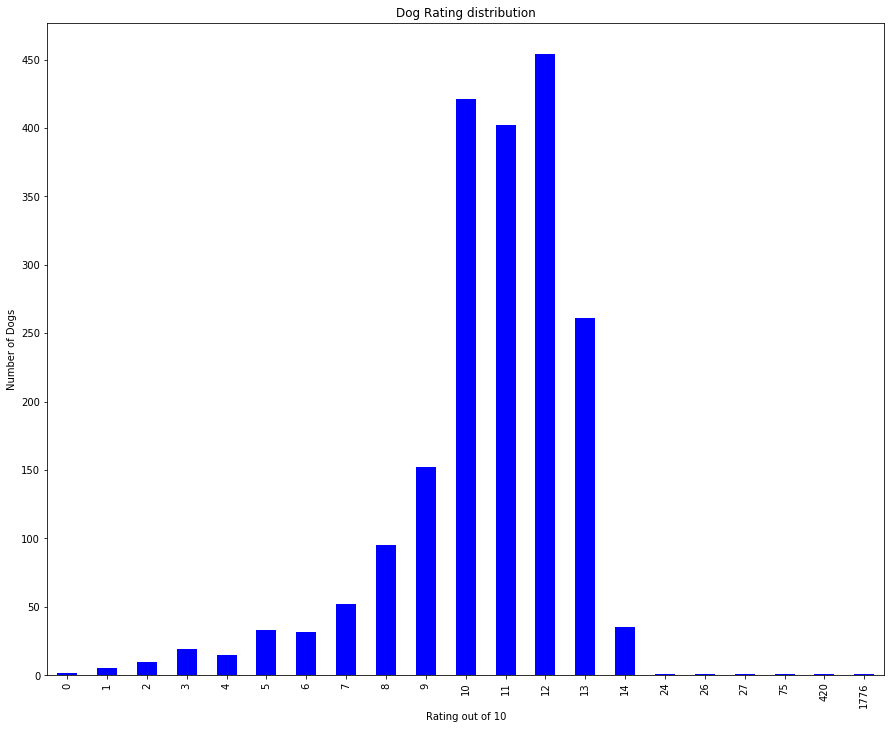

In [143]:
#plotting Dog ating distribution
rating_count = twitter_Arc_df_clean.rating_numerator.value_counts().sort_index()
rating_dist = rating_count.plot('bar', title = 'Dog Rating distribution',color='#0000ff')
rating_dist.set_xlabel("Rating out of 10")
rating_dist.set_ylabel("Number of Dogs")
rating_dist.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
plt.savefig('rating_dist')

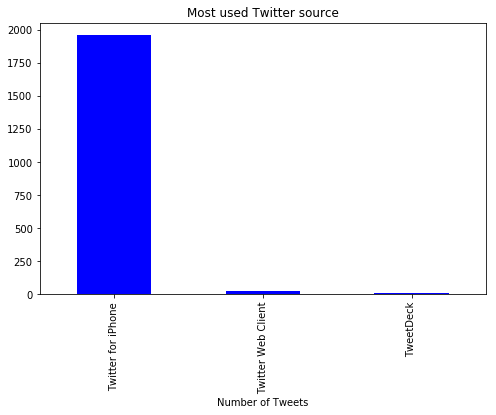

In [144]:
#Plotting the source used for tweeting
twitter_Arc_df_clean['source'].value_counts().plot('bar',figsize=(8,5),color='#0000ff', title='Most used Twitter source').set_xlabel("Number of Tweets")
plt.savefig('twitter_source')

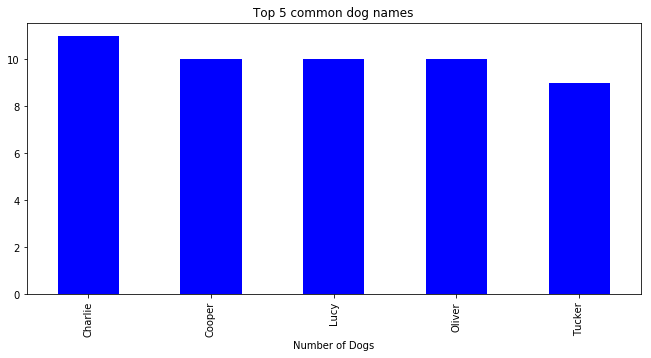

In [145]:
#plotting the top 5 dog name distribution
twitter_Arc_df_clean.name.value_counts()[1:6].plot('bar', figsize=(11,5), color='#0000ff',
                                                   title='Top 5 common dog names').set_xlabel("Number of Dogs")
plt.savefig('dog_names')

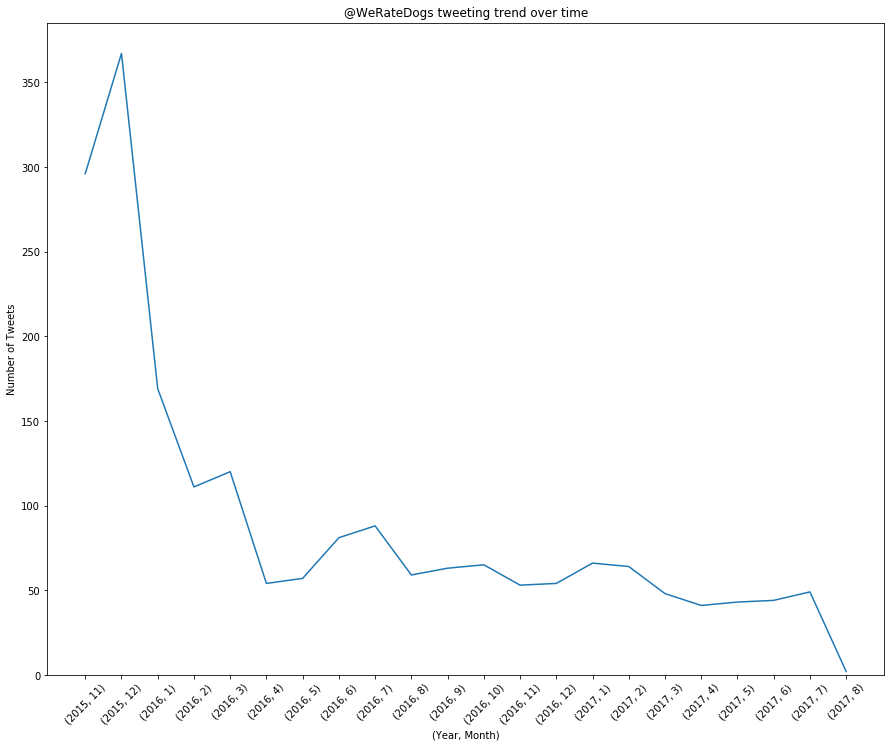

In [146]:
#plotting tweeting trend over time

year_month = twitter_Arc_df_clean.tweet_id.groupby([twitter_Arc_df_clean["timestamp"].dt.year,
                                           twitter_Arc_df_clean["timestamp"].dt.month]).count()
tweet_trend = year_month.plot('line', title = '@WeRateDogs tweeting trend over time')
tweet_trend.set_xlabel("(Year, Month)")
tweet_trend.set_ylabel("Number of Tweets")
tweet_trend.set_ylim(0, )
plt.xticks(list(range(len(year_month.index))),labels=year_month.index)
tweet_trend.set_xticklabels(year_month.index , rotation = 45)
plt.savefig('tweet_trend')

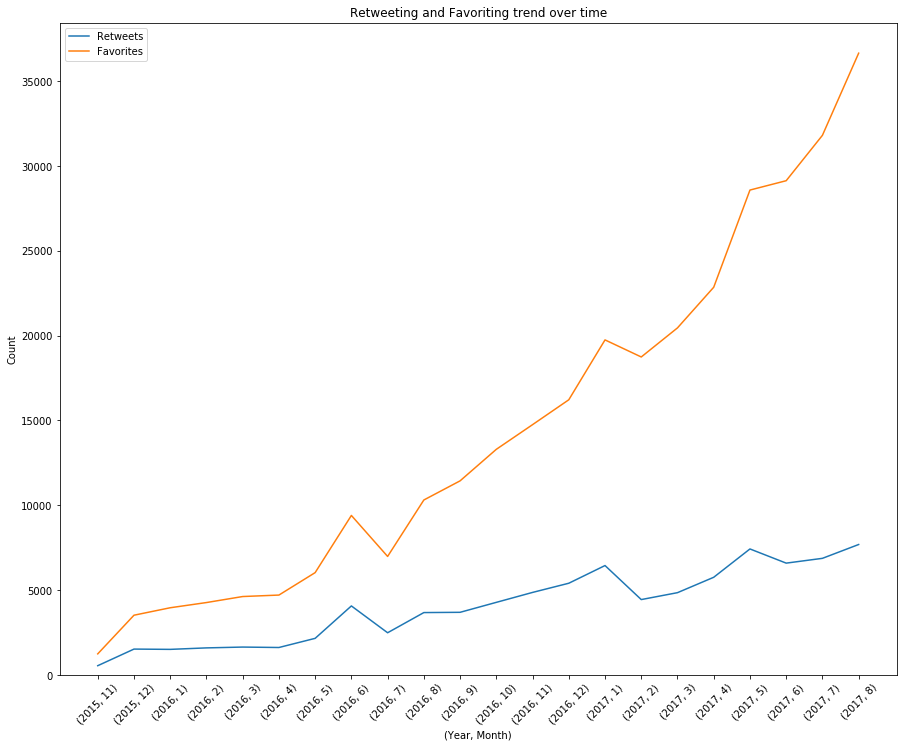

In [147]:
#plotting Retweeting and Favourite tweet trend over time

plt.subplots(1, sharex=True)
retweet_dist = twitter_Arc_df_clean.retweet_count.groupby([twitter_Arc_df_clean["timestamp"].dt.year, 
                                            twitter_Arc_df_clean["timestamp"].dt.month]).mean()
retweet_trend = retweet_dist.plot('line')
favourite_trend = twitter_Arc_df_clean.favorite_count.groupby([twitter_Arc_df_clean["timestamp"].dt.year,
                                             twitter_Arc_df_clean["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.xticks(list(range(len(retweet_dist.index))),labels=retweet_dist.index)
retweet_trend.set_xticklabels(retweet_dist.index,rotation = 45)
plt.savefig('ret_fav')